Uncover the factors that lead to employee attrition and explore important questions such as:
1. Show a breakdown of distance from home by job role and attrition.
2. Compare average monthly income by education and attrition.

Based on your analysis in Assignment 2, express your results in the form of the most
appropriate visualization using any visualization library of your choice.

In [ ]:
port numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
emp = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
emp.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [21]:
emp1 = emp[['Attrition', 'JobRole', 'DistanceFromHome' ]]
emp1

,Attrition,JobRole,DistanceFromHome
0,Yes,Sales Executive,1
1,No,Research Scientist,8
2,Yes,Laboratory Technician,2
3,No,Research Scientist,3
4,No,Laboratory Technician,2
...,...,...,...
1465,No,Laboratory Technician,23
1466,No,Healthcare Representative,6
1467,No,Manufacturing Director,4
1468,No,Sales Executive,2


In [22]:
emp1.groupby(['DistanceFromHome', 'JobRole']).count().reset_index()

,DistanceFromHome,JobRole,Attrition
0,1,Healthcare Representative,23
1,1,Human Resources,9
2,1,Laboratory Technician,31
3,1,Manager,13
4,1,Manufacturing Director,24
...,...,...,...
219,29,Manager,4
220,29,Manufacturing Director,4
221,29,Research Scientist,4
222,29,Sales Executive,5


Text(0, 0.5, 'Distance From Home')

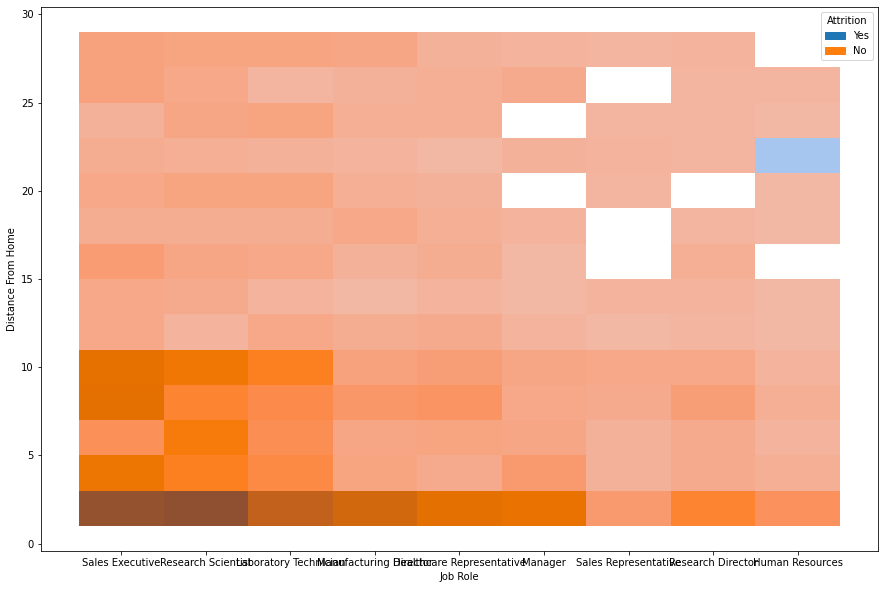

In [40]:
plt.figure(figsize=(15,10))
sns.histplot(x="JobRole", y="DistanceFromHome" ,hue="Attrition", data=emp1,)
plt.xlabel("Job Role")
plt.ylabel("Distance From Home")

In [41]:
emp2 = emp[['Attrition', 'MonthlyIncome', 'Education' ]]
emp2

,Attrition,MonthlyIncome,Education
0,Yes,5993,2
1,No,5130,1
2,Yes,2090,2
3,No,2909,4
4,No,3468,1
...,...,...,...
1465,No,2571,2
1466,No,9991,1
1467,No,6142,3
1468,No,5390,3


In [42]:
emp2.groupby(['Attrition', 'MonthlyIncome','Education']).count().reset_index()

,Attrition,MonthlyIncome,Education
0,No,1051,2
1,No,1052,1
2,No,1129,1
3,No,1200,3
4,No,1223,2
...,...,...,...
1442,Yes,18824,3
1443,Yes,19246,4
1444,Yes,19545,3
1445,Yes,19845,1


In [43]:
emp_monthlyincome = emp2[['Attrition', 'MonthlyIncome', 'Education']]
emp3 = emp_monthlyincome.groupby(['Attrition','Education']).mean().reset_index()
emp3

,Attrition,Education,MonthlyIncome
0,No,1,5926.129496
1,No,2,6586.058824
2,No,3,6882.919662
3,No,4,7087.814706
4,No,5,8559.906977
5,Yes,1,4360.161290
6,Yes,2,4282.545455
7,Yes,3,4770.242424
8,Yes,4,5335.155172
9,Yes,5,5850.200000


Text(0, 0.5, 'Average MonthlyIncome')

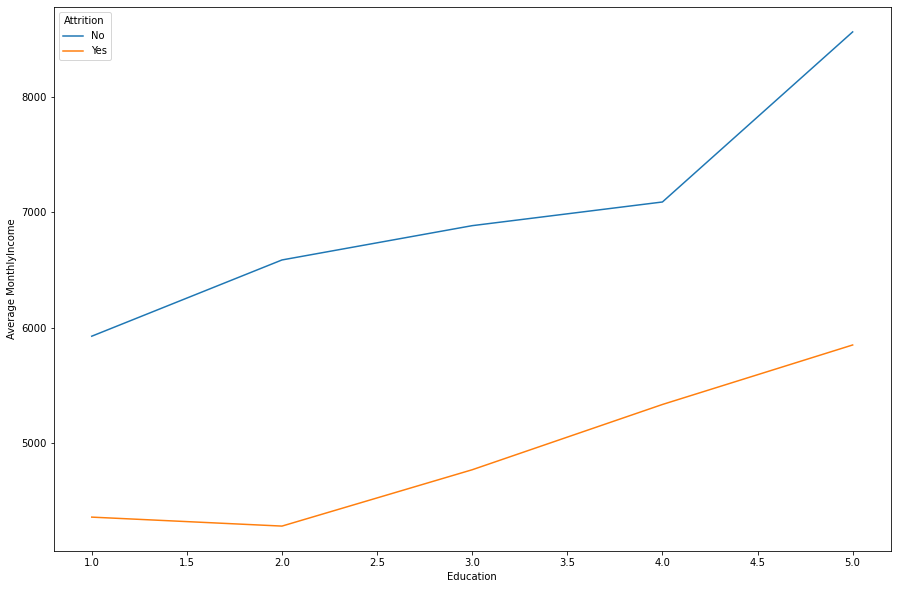

In [45]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Education", y="MonthlyIncome" , data=emp3 ,hue="Attrition")
plt.xlabel("Education")
plt.ylabel("Average MonthlyIncome")